<a href="https://colab.research.google.com/github/sachinkun21/CNN_Architectures/blob/master/VGG_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

>The full name of VGG is the Visual Geometry Group, which belongs to the Department of Science and Engineering of Oxford University. It has released a series of convolutional network models beginning with VGG, which can be applied to face recognition and image classification, from VGG16 to VGG19. 
for more info refer to the link below:

<a href="http://ethereon.github.io/netscope/#/gist/dc5003de6943ea5a6b8b" target="_blank">Network Structure of VGG19</a>
#### The network structure

>The input of VGG is set to an RGB image of 224x244 size. The average RGB value is calculated for all images on the training set image, and then the image is input as an input to the VGG convolution network. A 3x3 or 1x1 filter is used, and the convolution step is fixed. . There are 3 VGG fully connected layers, which can vary from VGG11 to VGG19 according to the total number of convolutional layers + fully connected layers. The minimum VGG11 has 8 convolutional layers and 3 fully connected layers. The maximum VGG19 has 16 convolutional layers. +3 fully connected layers. In addition, the VGG network is not followed by a pooling layer behind each convolutional layer, or a total of 5 pooling layers distributed under different convolutional layers. The following figure is VGG Structure diagram:




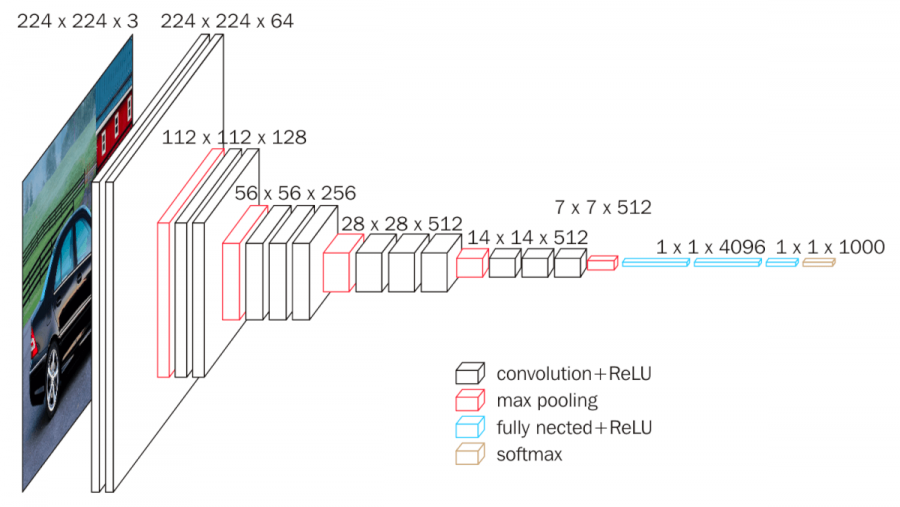

Detailed Block Diagram for VGG-16 is given below:

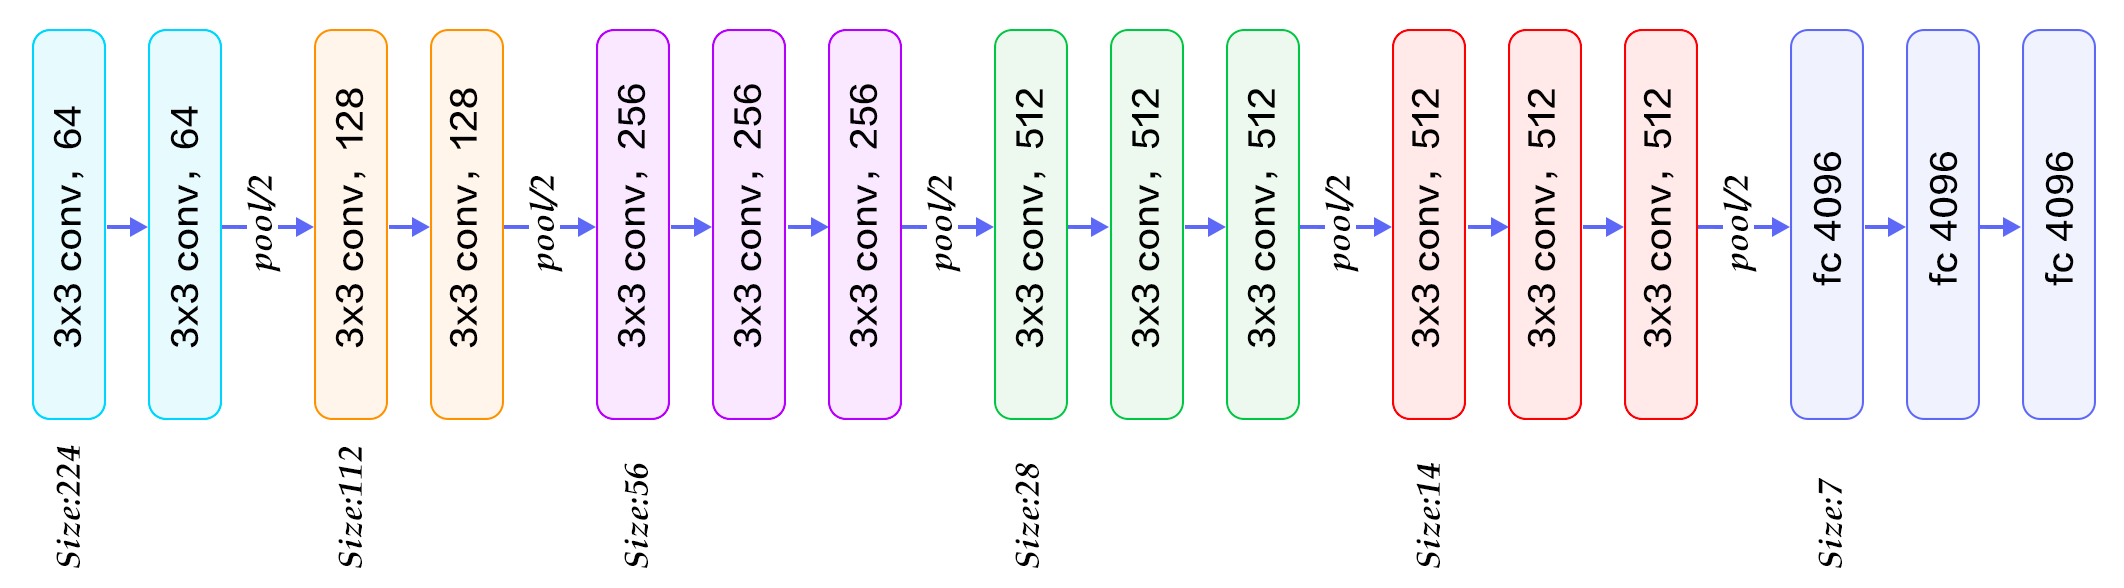

#### Key Characteristics of VGGNet:
 
1. A smaller 3 * 3 convolution kernel and a deeper network are used . The stack of two 3 * 3 convolution kernels is relative to the field of view of a 5 * 5 convolution kernel, and the stack of three 3 * 3 convolution kernels is equivalent to the field of view of a 7 * 7 convolution kernel. 

2. In this way, there can be fewer parameters (2 or 3 stacked 3 * 3 structures have only 7 * 7 structural parameters (3 * 3 * 3) / (7 * 7) = 55%); on the other hand, they have more The non-linear transformation increases the ability of CNN to learn features.

3. Also the pooling layers are applied over the output of stacked Conv Layers thus reducing the information lost at intermediate stages.

4. stride of 1 is used througout the network apart from pooling layer




### Keras Implementation:
Before we jump into architecture, let's load the flower dataset from drive

In [2]:
%ls drive/'My Drive'/DataScience/'flower Arrays'/

FlowerData_X.npz  FlowerData_Y.npz


In [3]:
# load numpy array from npz file
import numpy as np
from numpy import load


# load dict of arrays
dict_data_X = load('drive/My Drive/DataScience/flower Arrays/FlowerData_X.npz')
dict_data_Y = load('drive/My Drive/DataScience/flower Arrays/FlowerData_Y.npz')

# extract the first array
x,y = dict_data_X['arr_0'], dict_data_Y['arr_0']
# print the array shape
print(x.shape,y.shape)

(1360, 224, 224, 3) (1360, 17)


#### Load_Data

You can download the data from tflearn(requires tf 1.14)
or download from the below link as numpy array:

 https://drive.google.com/drive/folders/19h0evJqQ0wtxH3fGDCtPe-reQ8HGN8oc?usp=sharing

### Now let's create the Model Class for VGG

In [4]:
import tensorflow as tf

class VGG(tf.keras.Model):
  def __init__(self, act_fun = 'relu', shape=(224,224,3), pred_shape = 10, padding = 'same', batch_norm = False):
    super(VGG,self).__init__()
    self.batch_norm = batch_norm
    self.inp   = tf.keras.Input(shape=shape)
    
    # !st Convolutional Stack
    self.conv1_1 = tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv1_2 = tf.keras.layers.Conv2D(filters = 64,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
    if batch_norm:
        self.BN_1  = tf.keras.layers.BatchNormalization()
  
    
    # 2nd Convolutional Stack
    self.conv2_1 = tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv2_2 = tf.keras.layers.Conv2D(filters = 128,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
    if batch_norm:
        self.BN_2  = tf.keras.layers.BatchNormalization()
    
    # 3rd Convolutional Stack
    self.conv3_1 = tf.keras.layers.Conv2D(filters = 256,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv3_2 = tf.keras.layers.Conv2D(filters = 256,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv3_3 = tf.keras.layers.Conv2D(filters = 256,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
    if batch_norm:
        self.BN_3  = tf.keras.layers.BatchNormalization()

    



    # 4th Convolutional Stack
    self.conv4_1 = tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv4_2 = tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv4_3 = tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
    if batch_norm:
        self.BN_4  = tf.keras.layers.BatchNormalization()


    # 5th Convolutional Layer
    self.conv5_1 = tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv5_2 = tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.conv5_3 = tf.keras.layers.Conv2D(filters = 512,kernel_size = (3,3), activation=act_fun,  strides=(1, 1), padding=padding)
    self.pool5 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
    if batch_norm:
        self.BN_5  = tf.keras.layers.BatchNormalization()

    # Flatten
    self.flat = tf.keras.layers.Flatten(name = 'flattenLayer')

    # 1st Fully Connected Layer
    self.fc1 = tf.keras.layers.Dense(4096, activation = act_fun)
    
    # 2nd Fully Connected Layer
    self.fc2 = tf.keras.layers.Dense(4096, activation = act_fun)

    self.drop1= tf.keras.layers.Dropout(0.5)
    
    
    # Prediction layer
    self.pred = tf.keras.layers.Dense(pred_shape, activation = 'softmax')


  def call(self,inp):
    x = self.conv1_1(inp)
    x = self.conv1_2(x)
    x = self.pool1(x)
    if self.batch_norm:
        x = self.BN_1(x)

    x = self.conv2_1(x)
    x = self.conv2_2(x)
    x = self.pool2(x)
    if self.batch_norm:
        x = self.BN_2(x)

    x = self.conv3_1(x)
    x = self.conv3_2(x)
    x = self.conv3_3(x)
    x = self.pool3(x)
    if self.batch_norm:
        x = self.BN_3(x)

    x = self.conv4_1(x)
    x = self.conv4_2(x)
    x = self.conv4_3(x)
    x = self.pool4(x)
    if self.batch_norm:
        x = self.BN_4(x)

    x = self.conv5_1(x)
    x = self.conv5_2(x)
    x = self.conv5_3(x)
    x = self.pool5(x)
    if self.batch_norm:
        x = self.BN_5(x)

    x = self.flat(x)

    x = self.fc1(x)
    x = self.fc2(x)

    x = self.drop1(x)
    
    return self.pred(x)


vgg16 = VGG(act_fun = 'relu', shape=x.shape[1:], pred_shape = y.shape[1:][0])

# Let's Plot one random Example from each of the Class of Flower:

In [4]:
np.where(y[11]==1)

(array([7]),)

In [5]:
# to store index of image 
dict_image = {}


for i in range(len(y)):
  #print(y[i])
  #print(np.where(y[i]==1))
  index = (np.where(y[i]==1))[0][0]
  #print(index)
  dict_image[index]  = i  
  if len(dict_image)==17:
    print(dict_image)
    break

{8: 113, 1: 100, 15: 102, 6: 112, 11: 101, 16: 92, 2: 114, 13: 97, 9: 106, 7: 77, 3: 109, 4: 107, 0: 104, 5: 111, 12: 110, 10: 90, 14: 115}


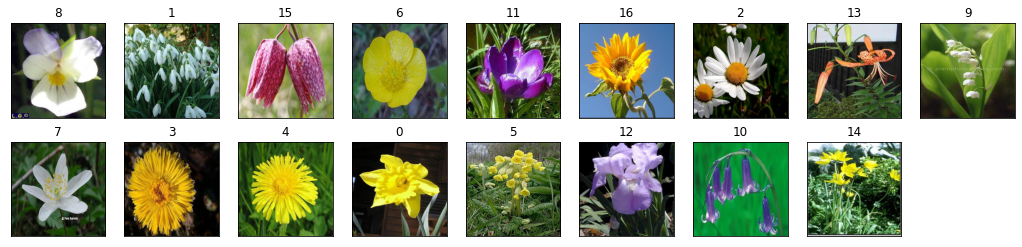

In [6]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(18,4))
i = 0 
for label,index in dict_image.items():
  ax = fig.add_subplot(2, 9, 1 + i, xticks=[], yticks=[])
  im = x[index,::]
  ax.set_title(label)
  plt.imshow(im)
  i+=1

plt.imshow(im)


In [7]:
x.shape[1:]

(224, 224, 3)

### Now let's Create and Compile the Model Object

In [8]:
# model Object
vgg_16 = VGG(act_fun = 'relu', shape=x.shape[1:], pred_shape = y.shape[1], padding = 'valid')

# Batch Size
batch_size = 32

# Compiling model with Optimizer and Loss
vgg_16.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='categorical_crossentropy',metrics = ['accuracy'])

In [9]:
vgg_16.fit(x, y, batch_size=batch_size, epochs=100, validation_split=0.3, shuffle=True,  verbose=1)

Epoch 1/100
30/30 [==============================] - 33s 1s/step - loss: 2.8196 - accuracy: 0.0547 - val_loss: 2.8335 - val_accuracy: 0.0538
Epoch 2/100
30/30 [==============================] - 23s 777ms/step - loss: 2.7947 - accuracy: 0.0694 - val_loss: 2.6991 - val_accuracy: 0.0758
Epoch 3/100
30/30 [==============================] - 23s 783ms/step - loss: 2.7346 - accuracy: 0.0726 - val_loss: 2.4973 - val_accuracy: 0.1834
Epoch 4/100
30/30 [==============================] - 24s 787ms/step - loss: 2.4318 - accuracy: 0.1314 - val_loss: 2.3021 - val_accuracy: 0.1320
Epoch 5/100
30/30 [==============================] - 24s 785ms/step - loss: 2.2751 - accuracy: 0.1746 - val_loss: 2.2010 - val_accuracy: 0.1687
Epoch 6/100
30/30 [==============================] - 23s 781ms/step - loss: 2.1617 - accuracy: 0.1977 - val_loss: 2.1325 - val_accuracy: 0.2054
Epoch 7/100
30/30 [==============================] - 23s 778ms/step - loss: 2.0612 - accuracy: 0.2639 - val_loss: 2.0074 - val_accuracy: 0.

In [11]:
# Summary of the Model
vgg_16.summary()

Model: "vgg_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           multiple                  1792      
_________________________________________________________________
conv2d_14 (Conv2D)           multiple                  36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_15 (Conv2D)           multiple                  73856     
_________________________________________________________________
conv2d_16 (Conv2D)           multiple                  147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_17 (Conv2D)           multiple                  295168

### Let's plot the Loss and Accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


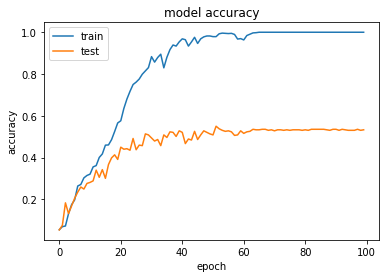

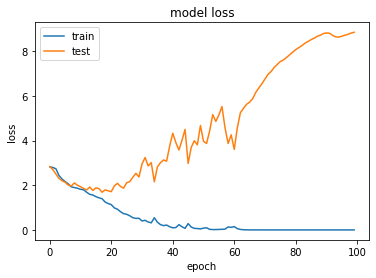

In [12]:
history = vgg_16.history

# list all data in history
print(history.history.keys())

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Batch normalization:
Batch normalization (BN) solves a problem called internal covariate shift.

Covariate shift means the distribution of the features is different in different parts of the training/test data, breaking the i.i.d assumption used across most of ML.

Internal covariate shift refers to covariate shift occurring within a neural network, i.e. going from (say) layer 2 to layer 3. This happens because, as the network learns and the weights are updated, the distribution of outputs of a specific layer in the network changes. This forces the higher layers to adapt to that drift, which slows down learning.

BN helps by making the data flowing between intermediate layers of the network look like whitened data.

#### Why Batch Norm Works

- After normalizing the input in the neural network, we don't have to worry about the scale of input features would be extremly different. Thus, the gradient descent can reduce the oscillations when approaching the minimum point and converge faster.

- Another important fact is that Batch Norm reduces the impacts of earlier layers on the later layers in deep neural network. If we take a slice from the middle of our neural network, suppose layer 5, we can find the input features of layer 5 change during the training. Therefore, it takes more time to train the model to converge.

- However, the use of Batch Norm can reduce the impacts of earlier layers by keeping the mean and variance fixed, which in some way makes the layers independent with each other. Consequently, the convergences become must faster.

- Another sided-effect of Batch Norm is regularization. By using mini-batch size, the minor noise will be added to each layer, which imposes the regulaization effects. But the regulaization effects decrease with larger batch size since the noise dimnishes.


### Using BatchNorm with lr = 0.001(10x) for comparison:

In [4]:
# model Object
vgg_16_norm = VGG(act_fun = 'relu', shape=x.shape[1:], pred_shape = y.shape[1], padding = 'valid', batch_norm = True)

# Batch Size
batch_size = 32

# Compiling model with Optimizer and Loss
vgg_16_norm.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy',metrics = ['accuracy'])

In [5]:
vgg_16_norm.fit(x, y, batch_size=batch_size, epochs=50, validation_split=0.3, shuffle=True,  verbose=1)

Epoch 1/50
30/30 [==============================] - 36s 1s/step - loss: 3.3370 - accuracy: 0.1661 - val_loss: 3.4003 - val_accuracy: 0.1516
Epoch 2/50
30/30 [==============================] - 23s 776ms/step - loss: 2.4379 - accuracy: 0.2524 - val_loss: 2.3830 - val_accuracy: 0.2029
Epoch 3/50
30/30 [==============================] - 23s 781ms/step - loss: 2.1331 - accuracy: 0.2902 - val_loss: 2.9928 - val_accuracy: 0.1051
Epoch 4/50
30/30 [==============================] - 23s 780ms/step - loss: 2.1046 - accuracy: 0.2755 - val_loss: 3.1156 - val_accuracy: 0.1809
Epoch 5/50
30/30 [==============================] - 23s 779ms/step - loss: 2.0137 - accuracy: 0.3197 - val_loss: 4.0316 - val_accuracy: 0.1271
Epoch 6/50
30/30 [==============================] - 24s 784ms/step - loss: 1.8387 - accuracy: 0.3354 - val_loss: 5.1945 - val_accuracy: 0.0733
Epoch 7/50
30/30 [==============================] - 23s 782ms/step - loss: 1.7607 - accuracy: 0.3849 - val_loss: 2.3202 - val_accuracy: 0.2861
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


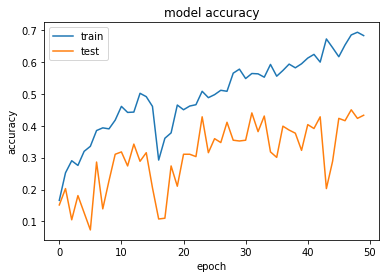

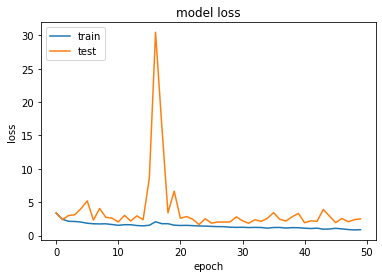

In [7]:
history = vgg_16_norm.history


import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
# model Object
vgg_16_norm2 = VGG(act_fun = 'relu', shape=x.shape[1:], pred_shape = y.shape[1], padding = 'valid', batch_norm = True)

# Batch Size
batch_size = 32

# Compiling model with Optimizer and Loss
vgg_16_norm2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001), loss='categorical_crossentropy',metrics = ['accuracy'])

In [10]:
vgg_16_norm2.fit(x, y, batch_size=batch_size, epochs=100, validation_split=0.3, shuffle=True,  verbose=1)

Epoch 1/100
30/30 [==============================] - 7s 224ms/step - loss: 2.2644 - accuracy: 0.2681 - val_loss: 2.8584 - val_accuracy: 0.0489
Epoch 2/100
30/30 [==============================] - 6s 210ms/step - loss: 1.4343 - accuracy: 0.5163 - val_loss: 3.0280 - val_accuracy: 0.0636
Epoch 3/100
30/30 [==============================] - 6s 210ms/step - loss: 1.1910 - accuracy: 0.5994 - val_loss: 3.2053 - val_accuracy: 0.0636
Epoch 4/100
30/30 [==============================] - 6s 209ms/step - loss: 0.9979 - accuracy: 0.6562 - val_loss: 3.3509 - val_accuracy: 0.0489
Epoch 5/100
30/30 [==============================] - 6s 210ms/step - loss: 0.8405 - accuracy: 0.7182 - val_loss: 4.2193 - val_accuracy: 0.0636
Epoch 6/100
30/30 [==============================] - 6s 210ms/step - loss: 0.6548 - accuracy: 0.7886 - val_loss: 4.2493 - val_accuracy: 0.0636
Epoch 7/100
30/30 [==============================] - 6s 209ms/step - loss: 0.5218 - accuracy: 0.8149 - val_loss: 3.5370 - val_accuracy: 0.0856

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


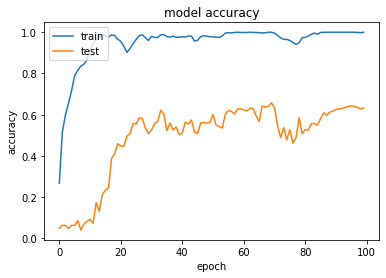

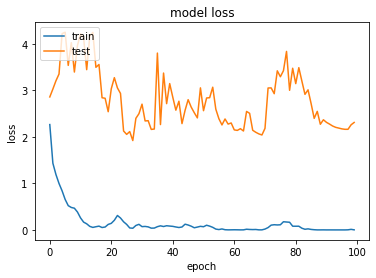

In [11]:
history = vgg_16_norm2.history


import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## vgg_16 on Cifar10

Note: Since image size is 28X28, changing padding to 'same' will help preserve the dimensions in conv as well as Pooling

In [ ]:
import keras
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape)

# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

print(x_train.shape,y_train.shape)

# Normalization
x_train = x_train / 255
x_test = x_test / 255



In [ ]:
x_train.shape[1:], y_train.shape

In [ ]:
# plotting some random 10 images
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(16,5))
for i in range(len(class_names)):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    img_num = idx[np.random.randint(idx.shape[0])]
    im = x_train[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

### One hot encoding the y_train

In [ ]:
# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

### Model Creation, Compilation and Training

In [ ]:
# Creating another model Object 
alexnet_cifar = AlexNet(act_fun = 'relu', shape=x_train.shape[1:], pred_shape = y_train.shape[1:][0], padding = 'same')

# Batch Size
batch_size = 128

# Compiling model with Optimizer and Loss
alexnet_cifar.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics = ['accuracy'])

In [ ]:
# Training model
alexnet_cifar.fit( x_train, y_train, batch_size=batch_size, epochs=1s00, validation_data=(x_test,y_test), shuffle=True,  verbose=1)

# Printing the summary
alexnet_cifar.summary()

### Let's see the history plot

In [ ]:
history = alexnet_cifar.history

# list all data in history
print(history.history.keys())

# plot history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()